**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 7**
Análisis de Componentes Principales (PCA)

---

MATRICULA / NOMBRE

*  A00466615 Manuel Alejandro de Luis López
*  A01796049 Edgar Mendoza Martínez
*  A01796032 Francisco Javier Salgado Acevedo
*  A01795975 Diego Andrés Bernal Díaz

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
DIR = "/content/drive/MyDrive/Tec_Monterrey/Ciencia_analitica_datos/Entregables/Semana_7"
os.chdir(DIR)

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [4]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301
74,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193


# **Parte 1**. EDA y preprocesamiento

1. Obtén estadísticas descriptivas para todas las variables del dataframe.

In [7]:
# Variables numericas
var_num = cereals_df.describe(include=[np.number])
var_num

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,76.000000,76.000000,75.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.802632,7.026316,98.666667,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,3.907326,4.378656,70.410636,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,42.500000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [8]:
# Variables categoricas
var_cat = cereals_df.describe(include=[object])
var_cat

,name,mfr,type
count,77,77,77
unique,77,7,2
top,100%_Bran,K,C
freq,1,23,74


Genera algunos gráficos para familiarizarte con el conjunto de datos. Al menos deberás incluir los que te permitan responder los siguientes cuestionamientos:

**Nota.** Debes responder de manera explícita las preguntas, apoyándote de los resultados observados de cada gráfico.

2a) ¿Cuál es la frecuencia o conteo de cada categoría para las variables: `mfr` y `shelf` (por separado)?

Frecuencia de cada categoría para la variable 'mfr':
* N: >= 5 cereales
* Q: >= 7 cereales
* K: <= 25 cereales
* R: >= 8 cereales
* G: <= 23 cereales
* P: <= 10 cereales
* A: = 1 cereal

Frecuencia de cada categoría para la variable 'shelf':
* Estante 1: >= 20 cereales
* Estante 2: >= 21 cereales
* Estante 3: >= 36 cereales


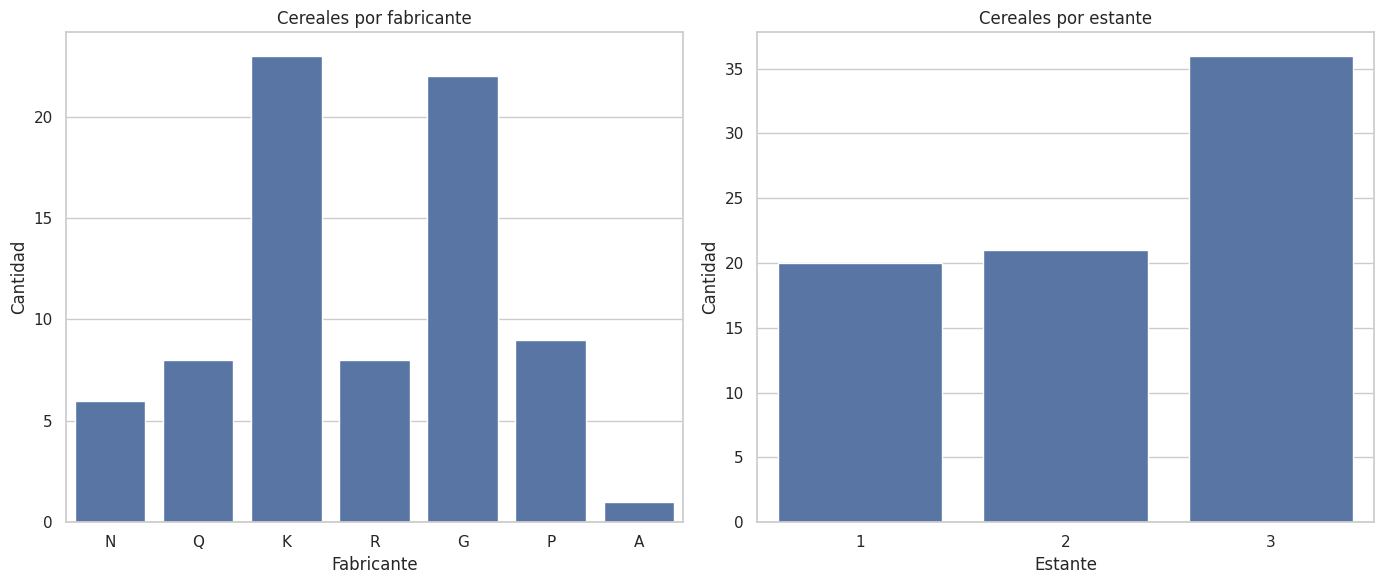

In [9]:
# Grafico de frecuencia para dos variables

# Graficos figura y un conjunto de subgráficos
sns.set(style="whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Grafico de 'mfr'
sns.countplot(x='mfr', data=cereals_df, ax=ax[0])
ax[0].set_title('Cereales por fabricante')
ax[0].set_xlabel('Fabricante')
ax[0].set_ylabel('Cantidad')

# Grafico de 'shelf'
sns.countplot(x='shelf', data=cereals_df, ax=ax[1])
ax[1].set_title('Cereales por estante')
ax[1].set_xlabel('Estante')
ax[1].set_ylabel('Cantidad')

# Mostrar
plt.tight_layout()
plt.show()

2b) Combina los resultados previos para observar, de cada fabricante, cuántos productos tiene en cada estante.


Cantidad de productos por fabricante en cada estante:

* N: Estante 1: 0 cereales
Estante 2: 1 cereal
Estante 3: 4 cereales
* Q: Estante 1: 0 cereales
Estante 2: 7 cereales
Estante 3: 1 cereal
* K: Estante 1: 8 cereales
Estante 2: 7 cereales
Estante 3: 8 cereales
* R: Estante 1: 0 cereales
Estante 2: 3 cereales
Estante 3: 5 cereales
* G: Estante 1: 6 cereales
Estante 2: 5 cereales
Estante 3: 11 cereales
* P: Estante 1: 5 cereales
Estante 2: 4 cereales
Estante 3: 0 cereales
* A: Estante 1: 1 cereal
Estante 2: 0 cereales
Estante 3: 0 cereales


In [12]:
# Crear una tabla que combine por fabricante los productos
tab_piv = cereals_df.pivot_table(index='mfr', columns='shelf', aggfunc='size', fill_value=0)

# Mostrar
tab_piv


shelf,1,2,3
mfr,,,
A,0,1,0
G,6,7,9
K,4,7,12
N,3,2,1
P,2,1,6
Q,1,3,4
R,4,0,4


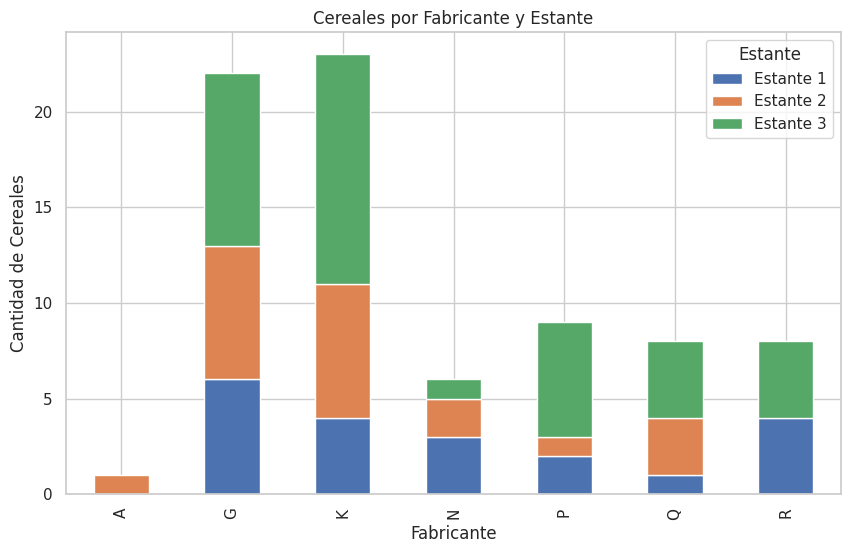

In [13]:
# Grafico de 'tab_piv'
tab_piv.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Cereales por Fabricante y Estante')
plt.xlabel('Fabricante')
plt.ylabel('Cantidad de Cereales')
plt.legend(title='Estante', labels=['Estante 1', 'Estante 2', 'Estante 3'], loc='upper right')

# Mostrar
plt.show()


 3a) ¿Cuál es el rango más frecuente de la variable `rating`?

 Debido a que no se sigue una distribución normal y se muestran varias modas, podemos interpretar que el rango más frecuente de la variable 'rating' se encuentra en los siguientes valores: 36.2, 36.5, 40.4, 50.8, 59.4. Son las modas redondeadas por lo que son valores muy cercanos a los que están entre los mas comunes. Gracias a la gráfica podemos determinar que los valores mas cercanos a 40.4 son los mas frecuentes de la variable 'rating'.



In [33]:
# Moda de 'rating"
cereals_df['rounded_rating'] = cereals_df['rating'].round(1)
moda_rating = cereals_df['rounded_rating'].mode()

moda_rating.values

array([36.2, 36.5, 40.4, 50.8, 59.4])

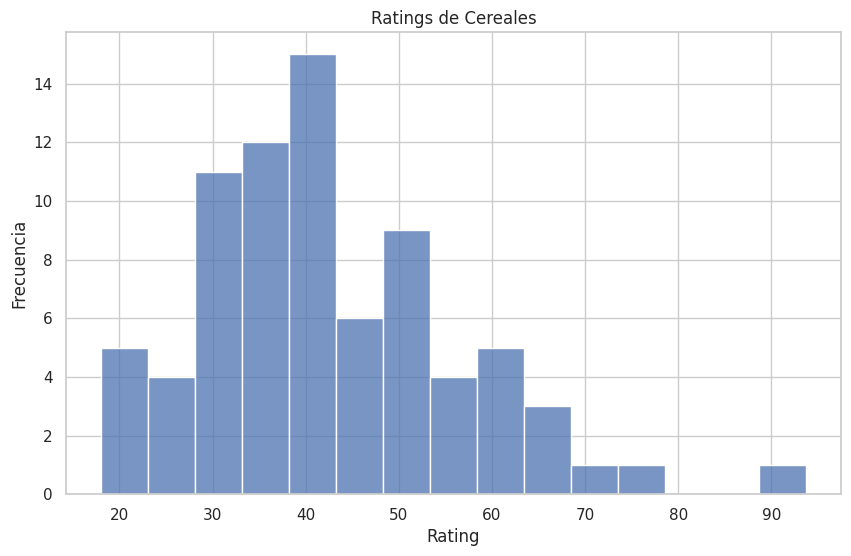

In [24]:
# Grafico de 'rating'
sns.set(style='whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(cereals_df['rating'], bins=15, )
plt.title('Ratings de Cereales')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')

# Mostrar
plt.show()


3b) ¿Cuáles son los 10 cereales mejor evaluados y a qué fabricante corresponden?

* All-Bran with Extra Fiber - Kellogg's | 93
* Shredded Wheat 'n'Bran- Nabisco | 74
* Shredded Wheat spoon - Nabisco | 72
* 100% Bran - Nabisco | 68
* Shredded Wheat - Nabisco | 68
* Cream of Wheat - Nabisco | 64
* Puffed Wheat - Quaker Oats | 63
* Puffed Rice - Quaker Oats | 60
* Nutri-grain - Kellogg's | 59
*  All-Bran - Kellogg's | 59

In [34]:
# Ordenar el DF por 'rating' y seleccionar Top 10
cereales_top = cereals_df.sort_values(by='rating', ascending=False).head(10)
cereales_top = cereales_top[['name', 'mfr', 'rating']] # Seleccionar solo columnas de interes

# Mostrar
cereales_top

,name,mfr,rating
3,All-Bran_with_Extra_Fiber,K,93.704912
64,Shredded_Wheat_'n'Bran,N,74.472949
65,Shredded_Wheat_spoon_size,N,72.801787
0,100%_Bran,N,68.402973
63,Shredded_Wheat,N,68.235885
20,Cream_of_Wheat_(Quick),N,64.533816
55,Puffed_Wheat,Q,63.005645
54,Puffed_Rice,Q,60.756112
50,Nutri-grain_Wheat,K,59.642837
2,All-Bran,K,59.425505


4a) Compara la distribución de las calorías según el fabricante, por medio de boxplots.

Descrubimientos sobre la comparativa:

* K y R ofrecen la mayor variabilidad en términos de contenido calórico de sus cereales.
* Q y P tienden a tener cereales con una distribución de calorías más consistente.
* N muestra tendencias hacia cereales de bajo contenido calórico.

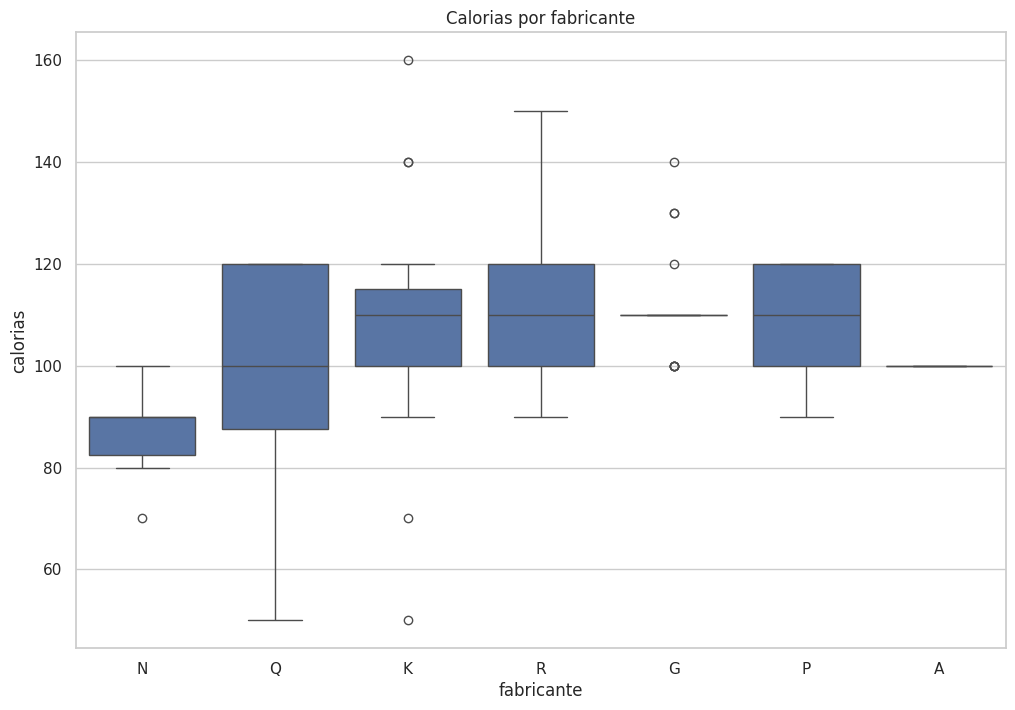

In [40]:
# Grafico de calorias por fabricante
plt.figure(figsize=(12,8))
sns.boxplot(x='mfr', y='calories', data=cereals_df)
plt.title('Calorias por fabricante')
plt.xlabel('fabricante')
plt.ylabel('calorias')

# Mostrar
plt.show()

4b) ¿Cuáles son las dos variables que tienen mayor correlación con `rating`?

* Las variables que mayor correlación tienen son 'fiber' y 'protein'. Esto quiere decir que los cereales que son mejor calificados tienden a tener mayores niveles de fibra y proteina.  

In [47]:
### Este me arrojó un error 'ValueError: could not convert string to float: '100%_Bran' ###

# Correlación y extraer solo las de 'rating'
cereals_df_num = cereals_df.select_dtypes(include=[np.number]) # Filtrar el DataFrame para incluir solo columnas con datos numéricos por el error '100%_Bran'
corr_df = cereals_df_num.corr()
rat_corr_df = corr_df['rating'].sort_values(ascending=False)

# Mostrar
rat_corr_df[1:]

### Este me arrojó un error 'ValueError: could not convert string to float: '100%_Bran' ###


rounded_rating    0.999998
fiber             0.584160
protein           0.470618
potass            0.416009
carbo             0.088712
shelf             0.025159
cups             -0.203160
vitamins         -0.240544
weight           -0.298124
sodium           -0.401295
fat              -0.409284
calories         -0.689376
sugars           -0.763902
Name: rating, dtype: float64


5. Elimina todos los registros con algún dato faltante y reinicia el índice del dataframe para que quede con valores consecutivos.

In [48]:
# Eliminar registros y reiniciar el indice
cereals_df_final = cereals_df.dropna()
cereals_df_final.reset_index(drop=True, inplace=True) # El argumento drop=True es para evitar que el índice antiguo se añada como una columna al DataFrame. El inplace=True modifica el DataFrame original sin necesidad de asignarlo a una nueva variable.

# Mostrar
cereals_df_final


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,rounded_rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.0,0.33,68.402973,68.4
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.0,1.00,33.983679,34.0
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.0,0.33,59.425505,59.4
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.0,0.50,93.704912,93.7
4,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.0,0.75,29.509541,29.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,Triples,G,C,110,2,1,250,0.0,21.0,3.0,60.0,25,3,1.0,0.75,39.106174,39.1
70,Trix,G,C,110,1,1,140,0.0,13.0,12.0,25.0,25,2,1.0,1.00,27.753301,27.8
71,Wheat_Chex,R,C,100,3,1,230,3.0,17.0,3.0,115.0,25,1,1.0,0.67,49.787445,49.8
72,Wheaties,G,C,100,3,1,200,3.0,17.0,3.0,110.0,25,1,1.0,1.00,51.592193,51.6


# **Parte 2**. Ingeniería de características

6. Considerando que `rating` es la variable de salida, almacénala en una variable `y` y separa los predictores **numéricos** en `X`. Escala los valores de `X` y aplica `PCA` para proyectar los datos en el nuevo espacio de vectores.

In [49]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [81]:
# Separar variables
y = cereals_df_final['rating']
X = cereals_df_final.select_dtypes(include=[np.number]).drop(columns=['rating'])

# Predictor y PCA
escalar = StandardScaler()
X_escala = escalar.fit_transform(X)
pca = PCA()
X_proj = pca.fit_transform(X_escala)
X_proj = pd.DataFrame(X_proj)

# Mostrar
X_proj.head(10)


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,5.746744,-1.188460,-0.983837,0.421133,-1.176438,-0.972281,-0.223730,-0.243574,-0.135091,0.049164,0.250426,0.010793,0.000275
1,0.412099,-1.869099,-2.901029,-0.858740,3.271605,-0.681093,-0.963089,0.903480,-0.842221,-0.594677,0.067167,-0.094465,0.000992
2,5.166762,-1.505351,-0.102893,0.169595,-1.559736,-1.997331,0.414923,0.186609,0.140250,0.084824,-0.517341,-0.015190,-0.000692
3,7.855895,0.240679,0.676515,0.467435,-1.770315,-0.781180,-0.699124,0.869762,-0.685847,0.107229,0.738962,0.076331,0.000267
4,-1.039139,-0.365348,-1.466512,-0.909732,-0.407883,-0.895989,-0.007366,-0.794317,-0.744300,-0.099115,0.099350,-0.080559,-0.000460
5,-1.385777,0.293442,-1.429894,0.325988,-0.942703,0.461402,-0.972423,-0.231030,0.909366,0.158210,0.395561,0.022084,0.001720
6,-0.583878,-2.163455,0.979940,-0.477093,0.706807,0.636435,0.741240,0.552550,0.244629,-0.728521,0.304616,0.209062,-0.002058
7,0.748954,0.703994,0.032795,-0.817322,-1.121562,-0.520872,0.432321,-0.278655,-1.096630,0.074944,-0.023744,0.371417,-0.000867
8,2.312435,-0.035949,0.478133,0.548021,-0.901324,-0.438654,0.289049,0.547428,0.630885,0.195878,-0.243859,-0.198023,-0.000152
9,-2.384978,-0.847806,-1.653141,0.060166,-0.259383,-0.817988,0.811915,-0.050814,-0.275348,0.045654,0.089024,-0.041781,-0.001639


In [59]:
print("Valores de covarianza: ", list(np.round(pca.explained_variance_, decimals=5)))

Valores de covarianza:  [3.68318, 3.19132, 1.93553, 1.03344, 1.00291, 0.73199, 0.68073, 0.42192, 0.32008, 0.09307, 0.06433, 0.01957, 0.0]


7. Obtén la curva del porcentaje de varianza acumulada y determine el número mínimo de componentes principales que explique más del 90% de la varianza. Imprime la información de dichos componentes.

Radio de varianza:  [0.27949285 0.52166171 0.66853632 0.74695775 0.82306215 0.87860837
 0.93026454 0.96228131 0.9865704  0.99363279 0.99851453 0.99999983
 1.        ]


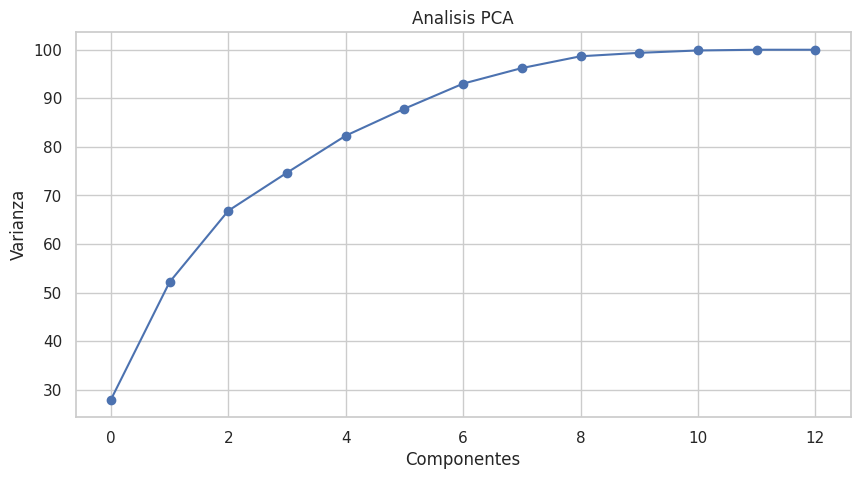

Número mínimo de componentes que explican más del 90% de la varianza: 7
Información de los componentes:
Componente 1: [-0.29961412  0.30735039 -0.03997407 -0.18343713  0.45346842 -0.19243781
 -0.22812501  0.4019277  -0.11599763  0.17121144 -0.0503524  -0.29461197
  0.43836835]
Componente 2: [-0.3930831  -0.16535517 -0.34572042 -0.1371883  -0.17988927  0.14949663
 -0.35139728 -0.30060692 -0.17286539 -0.26508621 -0.45026772  0.21230067
  0.25155597]
Componente 3: [ 0.11488095  0.27729971 -0.20487373  0.38941736  0.06976889  0.56243766
 -0.35537713  0.06763441  0.38787489 -0.00153289  0.24718058  0.13998895
  0.18185859]
Componente 4: [-0.20437893 -0.30075083 -0.18685191 -0.12030047 -0.03915708 -0.08783589
  0.02269589 -0.09087005  0.6041062   0.63887186 -0.15344024 -0.04749632
 -0.03834183]
Componente 5: [ 0.20388583  0.3197556   0.58688186 -0.33838609 -0.25511728  0.18273428
 -0.31487425 -0.14835804 -0.0492559   0.32911603 -0.22127988  0.12081403
  0.05757251]
Componente 6: [ 0.25589791

In [82]:
# Calcular varianza y radio de varianza
varianza_explicada = pca.explained_variance_ratio_
varianza_acumulada = np.cumsum(varianza_explicada)

print("Radio de varianza: ", varianza_acumulada)

# Numero minimo de componentes al 90%
num_componentes_90 = np.where(varianza_acumulada >= 0.90)[0][0] + 1 # +1 porque el indice comienzan en 0

# Grafica
plt.figure(figsize=(10, 5))
plt.plot(varianza_acumulada*100, marker='o' )
plt.xlabel('Componentes')
plt.ylabel('Varianza')
plt.title('Analisis PCA')

# Mostrar
plt.show()

# Informacion de componentes
print(f"Número mínimo de componentes que explican más del 90% de la varianza: {num_componentes_90}")
print("Información de los componentes:")
for i in range(num_componentes_90):
    print(f"Componente {i+1}: {pca.components_[i]}")


8. ¿Cuáles son las tres variables más importantes en el cálculo del primer componente?

* Las mas importantes son 'fiber' con .45, 'rounded_rating' con .43 y 'potass' con .40

Estas variables tienen las mayores cargas, lo que indica que son las que más contribuyen a la variabilidad en el DF.


In [85]:
# Cargar componentes
primer_comp = pca.components_[0]

# Obtenemos las variables y ordenarlas
nom_var = X.columns
df_cargas = pd.DataFrame(primer_comp, index=nom_var, columns=['Carga'])
df_cargas['Carga Absoluta'] = df_cargas['Carga'].abs()
df_ordenado = df_cargas.sort_values(by='Carga Absoluta', ascending=False)

# Mostrar
df_ordenado.head(3)


,Carga,Carga Absoluta
fiber,0.453468,0.453468
rounded_rating,0.438368,0.438368
potass,0.401928,0.401928


9. ¿Todas las variables categóricas son predictores? Aplica una técnica de encoding a las que sí lo sean. Justifica la elección de tu técnica.

La tecnica que usé fue la de pd.get_dummies, con la finalidad de convertir en numeros binarios '0,1' 'false,true'a las variables categoricas que son 'mfr' y 'type', estas son importantes ya que ambas pueden ser relevantes para predecir características como la popularidad o la saludabilidad de un cereal, que al dejarlas como categóricas no podemos procesarlas con funciones que manejen numeros.

No se incluyó 'shelf' ya que aun que está categorizado como numero se puede interpretar que su naturaleza es categorica ya que representa la ubicación fisica del cereal. Podríamos también aplicar aplicar el encoding a esta variable pero se decidió que no fue relevante para el ejercicio.

In [96]:
# Codificar variables categorias en binarias
cereals_df_encode = pd.get_dummies(cereals_df_final, columns=['mfr', 'type'], drop_first=True)

# Mostrar
cereals_df_encode.head(15)


,name,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,...,cups,rating,rounded_rating,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H
0,100%_Bran,70,4,1,130,10.0,5.0,6.0,280.0,25,...,0.33,68.402973,68.4,False,False,True,False,False,False,False
1,100%_Natural_Bran,120,3,5,15,2.0,8.0,8.0,135.0,0,...,1.00,33.983679,34.0,False,False,False,False,True,False,False
2,All-Bran,70,4,1,260,9.0,7.0,5.0,320.0,25,...,0.33,59.425505,59.4,False,True,False,False,False,False,False
3,All-Bran_with_Extra_Fiber,50,4,0,140,14.0,8.0,0.0,330.0,25,...,0.50,93.704912,93.7,False,True,False,False,False,False,False
4,Apple_Cinnamon_Cheerios,110,2,2,180,1.5,10.5,10.0,70.0,25,...,0.75,29.509541,29.5,True,False,False,False,False,False,False
5,Apple_Jacks,110,2,0,125,1.0,11.0,14.0,30.0,25,...,1.00,33.174094,33.2,False,True,False,False,False,False,False
6,Basic_4,130,3,2,210,2.0,18.0,8.0,100.0,25,...,0.75,37.038562,37.0,True,False,False,False,False,False,False
7,Bran_Chex,90,2,1,200,4.0,15.0,6.0,125.0,25,...,0.67,49.120253,49.1,False,False,False,False,False,True,False
8,Bran_Flakes,90,3,0,210,5.0,13.0,5.0,190.0,25,...,0.67,53.313813,53.3,False,False,False,True,False,False,False
9,Cap'n'Crunch,120,1,2,220,0.0,12.0,12.0,35.0,25,...,0.75,18.042851,18.0,False,False,False,False,True,False,False


10. Conjunta, en un dataframe, las valores proyectados en los componentes seleccionados (mínimo), las transformaciones obtenidas de las variables categóricas que serán predictores y la variable de salida. Almacena el dataframe resultante en archivo.

In [99]:
# Unir en DF los valores, las transformaciones y la variable de salida
final_cereal = pd.concat([X_proj, cereals_df_encode.drop(columns=['rating'])], axis=1)
final_cereal['rating'] = cereals_df_encode['rating']

# Mostrar
final_cereal



,0,1,2,3,4,5,6,7,8,9,...,cups,rounded_rating,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H,rating
0,5.746744,-1.188460,-0.983837,0.421133,-1.176438,-0.972281,-0.223730,-0.243574,-0.135091,0.049164,...,0.33,68.4,False,False,True,False,False,False,False,68.402973
1,0.412099,-1.869099,-2.901029,-0.858740,3.271605,-0.681093,-0.963089,0.903480,-0.842221,-0.594677,...,1.00,34.0,False,False,False,False,True,False,False,33.983679
2,5.166762,-1.505351,-0.102893,0.169595,-1.559736,-1.997331,0.414923,0.186609,0.140250,0.084824,...,0.33,59.4,False,True,False,False,False,False,False,59.425505
3,7.855895,0.240679,0.676515,0.467435,-1.770315,-0.781180,-0.699124,0.869762,-0.685847,0.107229,...,0.50,93.7,False,True,False,False,False,False,False,93.704912
4,-1.039139,-0.365348,-1.466512,-0.909732,-0.407883,-0.895989,-0.007366,-0.794317,-0.744300,-0.099115,...,0.75,29.5,True,False,False,False,False,False,False,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-0.932768,0.524307,1.240805,0.456401,0.738770,-0.176398,1.730305,0.690722,0.356280,-0.020194,...,0.75,39.1,True,False,False,False,False,False,False,39.106174
70,-2.127803,0.315771,-1.472283,0.380295,-0.382585,0.159846,-0.283186,0.264957,-0.038291,-0.098324,...,1.00,27.8,True,False,False,False,False,False,False,27.753301
71,0.652658,0.750647,1.000513,-1.280311,-0.399659,-0.643528,0.641612,-0.610580,-0.597105,0.110927,...,0.67,49.8,False,False,False,False,False,True,False,49.787445
72,0.332382,1.153789,1.074403,-1.301855,-0.087909,-0.514910,-0.514591,0.011586,-0.602166,-0.008419,...,1.00,51.6,True,False,False,False,False,False,False,51.592193


In [100]:
# Guardar el DataFrame resultante en un archivo CSV
final_cereal.to_csv('cereals_df_final.csv', index=False)


In [102]:
# Importar y mostrar el nuevo .csv
cereals_df_final = pd.read_csv('cereals_df_final.csv')
cereals_df_final

,0,1,2,3,4,5,6,7,8,9,...,cups,rounded_rating,mfr_G,mfr_K,mfr_N,mfr_P,mfr_Q,mfr_R,type_H,rating
0,5.746744,-1.188460,-0.983837,0.421133,-1.176438,-0.972281,-0.223730,-0.243574,-0.135091,0.049164,...,0.33,68.4,False,False,True,False,False,False,False,68.402973
1,0.412099,-1.869099,-2.901029,-0.858740,3.271605,-0.681093,-0.963089,0.903480,-0.842221,-0.594677,...,1.00,34.0,False,False,False,False,True,False,False,33.983679
2,5.166762,-1.505351,-0.102893,0.169595,-1.559736,-1.997331,0.414923,0.186609,0.140250,0.084824,...,0.33,59.4,False,True,False,False,False,False,False,59.425505
3,7.855895,0.240679,0.676515,0.467435,-1.770315,-0.781180,-0.699124,0.869762,-0.685847,0.107229,...,0.50,93.7,False,True,False,False,False,False,False,93.704912
4,-1.039139,-0.365348,-1.466512,-0.909732,-0.407883,-0.895989,-0.007366,-0.794317,-0.744300,-0.099115,...,0.75,29.5,True,False,False,False,False,False,False,29.509541
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,-0.932768,0.524307,1.240805,0.456401,0.738770,-0.176398,1.730305,0.690722,0.356280,-0.020194,...,0.75,39.1,True,False,False,False,False,False,False,39.106174
70,-2.127803,0.315771,-1.472283,0.380295,-0.382585,0.159846,-0.283186,0.264957,-0.038291,-0.098324,...,1.00,27.8,True,False,False,False,False,False,False,27.753301
71,0.652658,0.750647,1.000513,-1.280311,-0.399659,-0.643528,0.641612,-0.610580,-0.597105,0.110927,...,0.67,49.8,False,False,False,False,False,True,False,49.787445
72,0.332382,1.153789,1.074403,-1.301855,-0.087909,-0.514910,-0.514591,0.011586,-0.602166,-0.008419,...,1.00,51.6,True,False,False,False,False,False,False,51.592193
